In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [198]:
train = pd.read_csv('train.csv')

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [200]:
train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [201]:
train.isnull().sum()

_id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [202]:
for i in train.columns: # перебираем все столбцы
    if str(train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

_id
{'01fee2be3b7f0d36ff14404214222e21', '7f9e47ec5800e1a68f6161a25b0ab563', '31ef2c002623ceef28d6417495216fef', '984c7596df0bcf22bfc13f2f35f1a55e', '884cd51a43af8ca6c5bcd2e3516a7e65', '6dd7720934c997837a28dd79eefcc9a5', 'b1bdd9942f08e47047e5b88bb6a243d9', 'f5a711cf4b8b193d389405f054eec651', 'ae7f82dc11c818b6ae46ff53de425e3a', 'fd45e0b6af52af4341db1383cf2c627c', '92c0dc386399df9ed705132dea15d0f9', 'd23cd6e525c3040f95b1eb0709aec893', 'b6db9e4c2e049dacfe190efebd75f180', 'c8131fc5dfa0effa2fd424657791bc47', '40f6578a5d7114647e58506d5511aa85', '6aed7ac1c45c24409ece9b094c093550', 'd9a14192cb3364835ecd58c574877795', 'e8a13572f8d5efbf36b4c5358aa6c756', 'f56869530a97b13da24dfb555a8ba738', 'a3325db56defffa656ac0b3a72db00d2', '9070034311cec6c56c7c5b5b06f58caf', '6ee8dcb89ebfcb9a6c12a286dabe1e83', 'e46d027b4495c3e6a805b6984821034c', '68e087777140fd6d89d9b84a3181490e', '46d8a10cadb4a8f876f9f5e443f30f6d', '8c5edde9f9a769ad3c4f3cf12bc48f2c', '311d4639d62e52d37bbd38cdd61988d9', '462046100f4c79dcb7aac3

In [203]:
train1 = pd.get_dummies(train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']);
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 65 columns):
_id                              24712 non-null object
age                              24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
target                           24712 non-null int64
job_admin.                       24712 non-null uint8
job_blue-collar                  24712 non-null uint8
job_entrepreneur                 24712 non-null uint8
job_housemaid                    24712 non-null uint8
job_management  

In [204]:
train1.drop(['_id'], 1, inplace=True)

In [205]:
y = train1['target']

In [206]:
train1.drop(['target'], axis=1, inplace=True)

In [207]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 63 columns):
age                              24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
job_admin.                       24712 non-null uint8
job_blue-collar                  24712 non-null uint8
job_entrepreneur                 24712 non-null uint8
job_housemaid                    24712 non-null uint8
job_management                   24712 non-null uint8
job_retired                      24712 non-null uint8
job_self-employed

In [208]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train1, y)
predict = dtc.predict(train1)

In [209]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1, y, test_size=0.33, random_state=42)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.5064516129032258
recall 0.5091891891891892
accuracy 0.8880441446965052
f1 0.5078167115902965


In [210]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_proba_dtc = dtc.predict_proba(X_test)

In [211]:
predict_proba_dtc[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [212]:
from sklearn.metrics import precision_recall_curve
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])

(-0.01, 1.01)

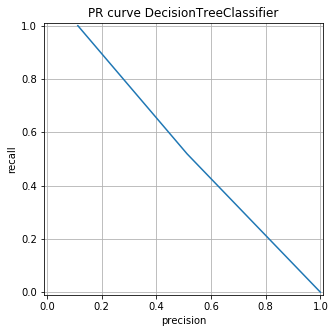

In [213]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve DecisionTreeClassifier')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

LogisticRegression

In [214]:
from sklearn.linear_model import LogisticRegression
lrn = LogisticRegression()
lrn.fit(X_train, y_train)
predict = lrn.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.6767857142857143
recall 0.4097297297297297
accuracy 0.9108522378908644
f1 0.5104377104377104


In [215]:
lrn.fit(X_train, y_train)
predict_proba_lrn = lrn.predict_proba(X_test)
predict_proba_lrn[:,1]

array([0.55401762, 0.00513135, 0.00579218, ..., 0.00771916, 0.01517935,
       0.08024625])

In [216]:
from sklearn.metrics import precision_recall_curve
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])

(-0.01, 1.01)

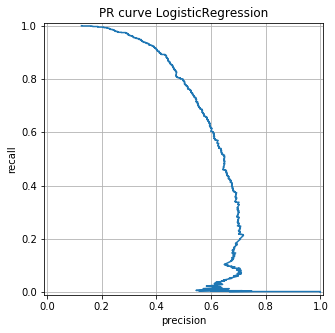

In [217]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_lrn, recall_lrn)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve LogisticRegression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
predict = knc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.577807848443843
recall 0.4616216216216216
accuracy 0.9006744328632741
f1 0.5132211538461539


In [219]:
knc.fit(X_train, y_train)
predict_proba_knc = knc.predict_proba(X_test)
predict_proba_knc[:,1]

array([0.8, 0. , 0. , ..., 0. , 0. , 0.4])

In [220]:
from sklearn.metrics import precision_recall_curve
precision_knc, recall_knc, thresholds_knc = precision_recall_curve(y_test, predict_proba_knc[:,1])

(-0.01, 1.01)

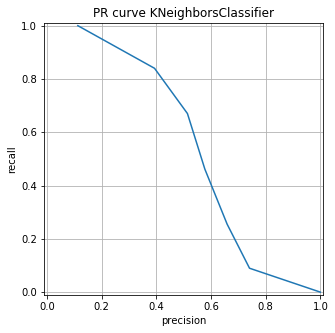

In [221]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_knc, recall_knc, thresholds_knc = precision_recall_curve(y_test, predict_proba_knc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_knc, recall_knc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve KNeighborsClassifier')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

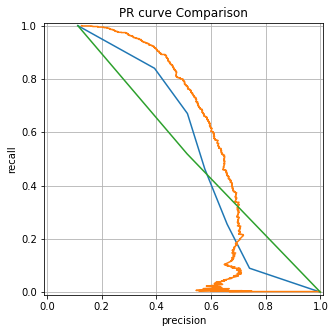

In [222]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_knc, recall_knc)
plt.plot(precision_lrn, recall_lrn)
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve Comparison')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

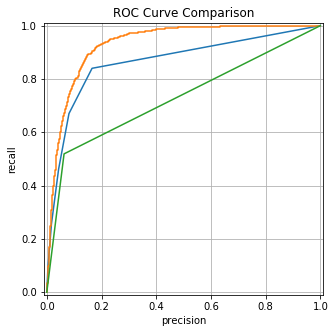

In [223]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
precision_lrn, recall_lrn, thresholds_lrn = roc_curve(y_test, predict_proba_lrn[:,1])
precision_knc, recall_knc, thresholds_knc = roc_curve(y_test, predict_proba_knc[:,1])
precision_dtc, recall_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_knc, recall_knc)
plt.plot(precision_lrn, recall_lrn)
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('ROC Curve Comparison')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [224]:
print ("Logistic Regression ROC AUC SCORE =", roc_auc_score(y_test, predict_proba_lrn[:,1]))

Logistic Regression ROC AUC SCORE = 0.9323358379126013


In [225]:
print ('KNeighborsClassifier ROC AUC SCORE =', roc_auc_score(y_test, predict_proba_knc[:,1]))

KNeighborsClassifier ROC AUC SCORE = 0.8647871107622145


In [226]:
print ('DecisionTreeClassifier ROC AUC SCORE =', roc_auc_score(y_test, predict_proba_dtc[:,1]))

DecisionTreeClassifier ROC AUC SCORE = 0.7279241897499159


Применяем к тесту Logistic Regression

In [227]:
test = pd.read_csv('test.csv')
test1 = pd.get_dummies(test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']);
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 64 columns):
_id                              16476 non-null object
age                              16476 non-null int64
duration                         16476 non-null int64
campaign                         16476 non-null int64
pdays                            16476 non-null int64
previous                         16476 non-null int64
emp.var.rate                     16476 non-null float64
cons.price.idx                   16476 non-null float64
cons.conf.idx                    16476 non-null float64
euribor3m                        16476 non-null float64
nr.employed                      16476 non-null float64
job_admin.                       16476 non-null uint8
job_blue-collar                  16476 non-null uint8
job_entrepreneur                 16476 non-null uint8
job_housemaid                    16476 non-null uint8
job_management                   16476 non-null uint8
job_retired     

In [228]:
test1.drop(['_id'], 1, inplace=True)

In [229]:
y_hat = lrn.predict_proba(test1)[:, 1]

In [230]:
test1.loc[:,'prediction'] = y_hat

In [231]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 64 columns):
age                              16476 non-null int64
duration                         16476 non-null int64
campaign                         16476 non-null int64
pdays                            16476 non-null int64
previous                         16476 non-null int64
emp.var.rate                     16476 non-null float64
cons.price.idx                   16476 non-null float64
cons.conf.idx                    16476 non-null float64
euribor3m                        16476 non-null float64
nr.employed                      16476 non-null float64
job_admin.                       16476 non-null uint8
job_blue-collar                  16476 non-null uint8
job_entrepreneur                 16476 non-null uint8
job_housemaid                    16476 non-null uint8
job_management                   16476 non-null uint8
job_retired                      16476 non-null uint8
job_self-employed

In [234]:
test1.to_csv('Answer.csv', sep=',')

In [235]:
a = test[(test.columns[pd.Series(test.columns).str.startswith('_id')])]
b = test1[(test1.columns[pd.Series(test1.columns).str.startswith('prediction')])]
df3 = pd.concat([a, b], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 2 columns):
_id           16476 non-null object
prediction    16476 non-null float64
dtypes: float64(1), object(1)
memory usage: 257.5+ KB


In [237]:
df3 = df3.rename(columns={'prediction': 'target'})

In [238]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 2 columns):
_id       16476 non-null object
target    16476 non-null float64
dtypes: float64(1), object(1)
memory usage: 257.5+ KB


In [236]:
df3.to_csv('Final_Answer.csv', sep=',')